<a href="https://colab.research.google.com/github/tanishq252/AI-ML-DS-Learning-Series/blob/main/LDA_on_Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Discriminant Analysis**
###Number of components we are having have to be strictly less than or equal to (number of output classes-1), else we get ValueError
[LDA and it's importance](https://towardsdatascience.com/linear-discriminant-analysis-explained-f88be6c1e00b)

#Import libraries and dataset

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
dataSet = pd.read_csv('Wine.csv')

In [58]:
dataSet

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [59]:
# Problem Statemen is to predict whether the asset is purchased or not

In [60]:
x = dataSet.iloc[:,:-1].values
y = dataSet.iloc[:, -1].values
x

array([[1.42e+01, 1.71e+00, 2.43e+00, ..., 1.04e+00, 3.92e+00, 1.06e+03],
       [1.32e+01, 1.78e+00, 2.14e+00, ..., 1.05e+00, 3.40e+00, 1.05e+03],
       [1.32e+01, 2.36e+00, 2.67e+00, ..., 1.03e+00, 3.17e+00, 1.18e+03],
       ...,
       [1.33e+01, 4.28e+00, 2.26e+00, ..., 5.90e-01, 1.56e+00, 8.35e+02],
       [1.32e+01, 2.59e+00, 2.37e+00, ..., 6.00e-01, 1.62e+00, 8.40e+02],
       [1.41e+01, 4.10e+00, 2.74e+00, ..., 6.10e-01, 1.60e+00, 5.60e+02]])

#Splitting the Dataset

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 7)

#Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)
print(x_train.shape)

(142, 13)


#Applying LDA to maximize the separation between two classes an reduce the dimenionality to 2 .... The working of LDA is similar to PCA expect the fact that LDA in supervised and PCA is unsupervised and the key takeaway from LDA is tha it maximizes separation between classes as mentioned above

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components = 2)
 
x_train = LDA.fit_transform(x_train, y_train)
x_test = LDA.transform(x_test)

In [65]:
print(x_train.shape)

(142, 2)


#Fitting the model on our data set

In [66]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state=0)

In [67]:
RFModel.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [68]:
RFModel.score(x_train, y_train)

1.0

In [69]:
RFModel.score(x_test, y_test)

0.9722222222222222

####LDA outperforms PCA and has great training as well as testing accuracies on the given dataSet

#Predicting on test data set

In [70]:
y_pred = RFModel.predict(x_test)

In [71]:
y_pred

array([3, 1, 3, 3, 2, 3, 2, 1, 2, 3, 1, 2, 3, 2, 2, 2, 2, 3, 1, 1, 2, 2,
       2, 3, 1, 3, 2, 3, 3, 3, 2, 1, 3, 2, 2, 2])

In [72]:
y_test

array([3, 1, 3, 3, 2, 3, 2, 1, 2, 3, 1, 2, 3, 2, 2, 2, 2, 3, 1, 1, 2, 2,
       2, 2, 1, 3, 2, 3, 3, 3, 2, 1, 3, 2, 2, 2])

In [73]:
# to compare the predicted and actual outputs let us concatenate both of em and print so that it is easy to check ;)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [1 1]
 [3 3]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [3 2]
 [1 1]
 [3 3]
 [2 2]
 [3 3]
 [3 3]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [2 2]]


#Confusion Matrix

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 7  0  0]
 [ 0 16  1]
 [ 0  0 12]]


In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9722222222222222

In [76]:
# we get accuracy of almost 80% 

In [77]:
import seaborn as sns

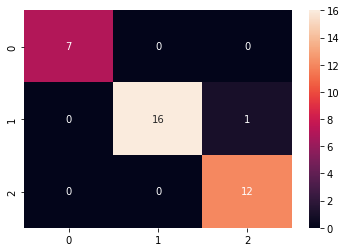

In [78]:
sns.heatmap(cm, annot=True)

#Visualisation of training dataset


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


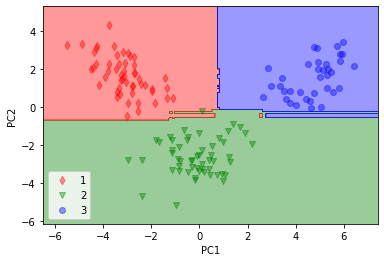

In [79]:
from matplotlib.colors import ListedColormap

markers = ('d', 'v',"o")
colors = ('red','green', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_train))])

    # plot the decision surface
x1_min, x1_max = x_train[:, 0].min() - 1,  x_train[:, 0].max() + 1    
x2_min, x2_max =  x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
np.arange(x2_min, x2_max, 0.02))
Z = RFModel.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(x=x_train[y_train == cl, 0], y=x_train[y_train == cl, 1],
                alpha=0.4, c=cmap(idx),
                marker=markers[idx], label=cl)
    

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

#Visualisation of testing dataset


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


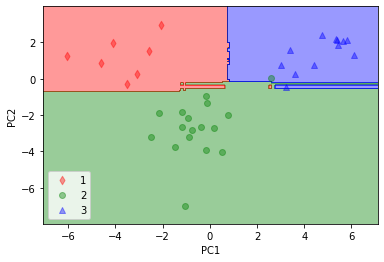

In [80]:
from matplotlib.colors import ListedColormap

markers = ('d', 'o', '^', 'v')
colors = ('red','green', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

    # plot the decision surface
x1_min, x1_max = x_test[:, 0].min() - 1,  x_test[:, 0].max() + 1    
x2_min, x2_max =  x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
np.arange(x2_min, x2_max, 0.02))
Z =RFModel.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test[y_test == cl, 0], y=x_test[y_test == cl, 1],
                alpha=0.4, c=cmap(idx),
                marker=markers[idx], label=cl)
    

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

#**Working on breast cancer dataset**

###Importing Dataset

In [97]:
dataSet = pd.read_csv('data.csv')
dataSet

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [98]:
x = dataSet.iloc[:,2:14].values
y = dataSet.iloc[:, 1].values

In [99]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [100]:
x

array([[1.80e+01, 1.04e+01, 1.23e+02, ..., 7.87e-02, 1.09e+00, 9.05e-01],
       [2.06e+01, 1.78e+01, 1.33e+02, ..., 5.67e-02, 5.43e-01, 7.34e-01],
       [1.97e+01, 2.12e+01, 1.30e+02, ..., 6.00e-02, 7.46e-01, 7.87e-01],
       ...,
       [1.66e+01, 2.81e+01, 1.08e+02, ..., 5.65e-02, 4.56e-01, 1.07e+00],
       [2.06e+01, 2.93e+01, 1.40e+02, ..., 7.02e-02, 7.26e-01, 1.59e+00],
       [7.76e+00, 2.45e+01, 4.79e+01, ..., 5.88e-02, 3.86e-01, 1.43e+00]])

###Splitting the dataset

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 77)

In [102]:
x_train.shape

(455, 12)

###Feature Scaling

In [103]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)
print(x_train)

[[-0.49 -0.99 -0.56 ... -0.71 -1.03 -1.  ]
 [ 1.13  0.15  1.1  ... -0.72  0.11 -0.82]
 [ 0.1   1.89  0.17 ...  1.1  -0.15 -0.35]
 ...
 [ 0.86  1.4   0.81 ... -1.18  0.33  0.81]
 [-0.65 -0.43 -0.68 ... -0.76 -0.72  0.02]
 [-0.05  0.44 -0.11 ... -0.6  -0.54  0.49]]


#Applying LDA

In [104]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components = 1)
 
x_train = LDA.fit_transform(x_train, y_train)
x_test = LDA.transform(x_test)

In [107]:
x_train.shape
# we can observe that shape of dataset is reduced i.e we are having 1 features instead of 12 due to PCA

(455, 1)


###Training the model

In [108]:
RFModel = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=0)
RFModel.fit(x_train, y_train)
RFModel.score(x_train, y_train)


0.9846153846153847

In [109]:
RFModel.score(x_test, y_test)


0.9298245614035088

###Confusion Matrix

In [110]:
y_pred = RFModel.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[72  3]
 [ 5 34]]


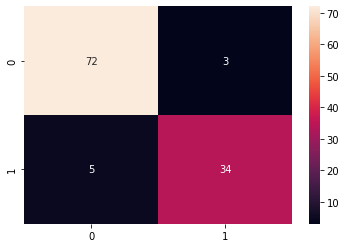

In [111]:
sns.heatmap(cm, annot=True)

###Visualisation of the data

In [112]:
# to compare the prediceted and actual outputs let us concatenate both of em and print so that it is easy to check ;)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'M']
 ['B' 'M']
 ['B' 'B']
 ['B' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']